In [115]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import CubicSpline

In [ ]:
# read in file
fname = 'Untitled.txt'
with open(fname) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]

In [24]:
# pull segments
keep_data = []
temp_list = []
for i in content:
    if '.' in i and 'l' not in i and 't' not in i:
        temp_list.append(i)
    else:
        keep_data.append(temp_list)
        temp_list = []
keep_data = [k for k in keep_data if len(k) > 0]

In [78]:
# convect segments to arrays
data_to_num = []
for seg in keep_data:
    data = []
    for p in seg:
        data.append(eval(p))
    data_to_num.append(data)

    
list_of_segment_arrays = []
for i in data_to_num:
    segment_points = []
    for j in i:
        for k in j:
            segment_points.append(k)
    list_of_segment_arrays.append(segment_points)
list_of_segment_arrays = [np.array(k) for k in list_of_segment_arrays] #finally a list of arrays

(37.59777524813909, 37.60012363913153)

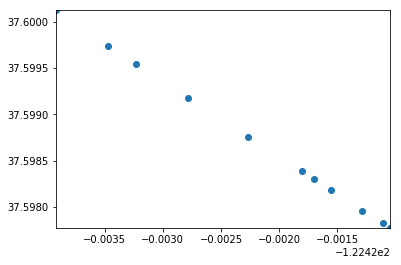

In [114]:
### plot points
plt.scatter(x = list_of_segment_arrays[1][:,0], y=list_of_segment_arrays[1][:,1])
plt.xlim(min(list_of_segment_arrays[1][:,0]),max(list_of_segment_arrays[1][:,0]))
plt.ylim(min(list_of_segment_arrays[1][:,1]),max(list_of_segment_arrays[1][:,1]))

In [127]:
sorted_segment = np.sort(list_of_segment_arrays[1],axis=1)[::-1]
spline = CubicSpline(x=sorted_segment[:,0],y=sorted_segment[:,1])

In [133]:
min_val = np.min(sorted_segment[:,0])
max_val = np.max(sorted_segment[:,0])
new_x = np.linspace(start=min_val,stop=max_val,num=50)
new_y = spline(new_x)

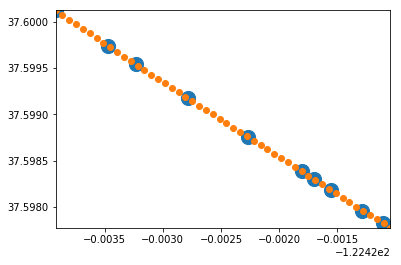

In [139]:
### plot points
plt.scatter(x = list_of_segment_arrays[1][:,0], y=list_of_segment_arrays[1][:,1],s=200)
plt.xlim(min(list_of_segment_arrays[1][:,0]),max(list_of_segment_arrays[1][:,0]))
plt.ylim(min(list_of_segment_arrays[1][:,1]),max(list_of_segment_arrays[1][:,1]))
plt.scatter(x = new_x, y=new_y)
plt.savefig('interpolated_path.jpg')

In [125]:
np.sort(list_of_segment_arrays[1],axis=1)[::-1]

array([[-122.42392174,   37.60012364],
       [-122.4234736 ,   37.59974271],
       [-122.42323269,   37.59953999],
       [-122.42278358,   37.59917274],
       [-122.42226361,   37.59875271],
       [-122.42180538,   37.59838546],
       [-122.42170173,   37.59830001],
       [-122.42155722,   37.59818365],
       [-122.42128632,   37.59796184],
       [-122.4211072 ,   37.59782547],
       [-122.42104415,   37.59777525]])

In [149]:
f = open('output.txt', 'w')
for t in list(zip(new_x,new_y)):
    f.write(' '.join(str(s) for s in t) + '\n')

In [ ]:
for t in some_list:
  f.write(' '.join(str(s) for s in t) + '\n')